# Что это такое?

Базовая идея во всех подобных алгоритмах это использование определенного ключа токена для идентификации пользователя
токен не привязан ни к домену не к браузеру главное указать его в заголовке запроса а откуда он был отправлен - не важно
благодаря этому сайт может взаимодействовать с разными конечными устройствами и у нас нет привязанности к определенному браузеру
как в случае Session-based auth

Популярные подходы в DRF реализации токенов
- обычная аутентификация токенами (библиотека Djoser)
- JWT=токены (библиотека Simple JWT)

# Как это работает?

В начале сервер клиенту отправляет форму, где клиент вводит логин и пароль далее он эту информацию POST запросом отправляет
на сервер. Сервер проверяет есть ли в базе данных такой пользователь с таким логином и паролем и если находит то назначает
ему определенную комбинацию (ключ) в виде символов и цифр и этот токен(ключ) связывает с конкретным пользователем(user_id) в БД
далее он этот токен отправляет клиенту и клиент сохраняет его в защищенном локальном хранилище

Когда клиент, который авторизован захочет получить на сервере какую-то защищенную информацию, то в заголовке с GET запросом
он должен передать этот токен

```http
GET / HTTP/1.1
Authorization: Token <data>
```

Сервер смотрит в базе данных есть ли такой токен и если он его находит то понимает с каким пользователем он связан
таким образом происходит **аутентификация пользователя**

Такой токен может отправить абсолютно любой клиент, главное чтобы в заголовке запроса присутствовал токен
если она присутствует, то пользователь считается идентифицированным
жить токена достаточно большое (если пользователь не выйдет из системы, иначе ключ будет удален)
по итогу единожды полученный токен может быть использован многократно для доступа к приватной информации

[Документация по установке Djoser](https://djoser.readthedocs.io/en/latest/)
Только вместо     'django.contrib.auth' добавляем 'rest_framework.authtoken'
чтобы DRF использовал стандартную таблицу для авторизации по токенам
Далее выполняем миграцию, поскольку в нашем проекте появилась новая модель

```bash
python manage.py migrate
```

[Прописываем необходимые маршруты]( https://djoser.readthedocs.io/en/latest/authentication_backends.html)

```python
urlpatterns = [
    path('api/v1/auth/', include('djoser.urls')),
    re_path(r'^auth/', include('djoser.urls.authtoken')),
]
```


Переходим по маршруту http://127.0.0.1:8000/api/v1/auth/users/
<br>
Здесь находится весь список пользователей

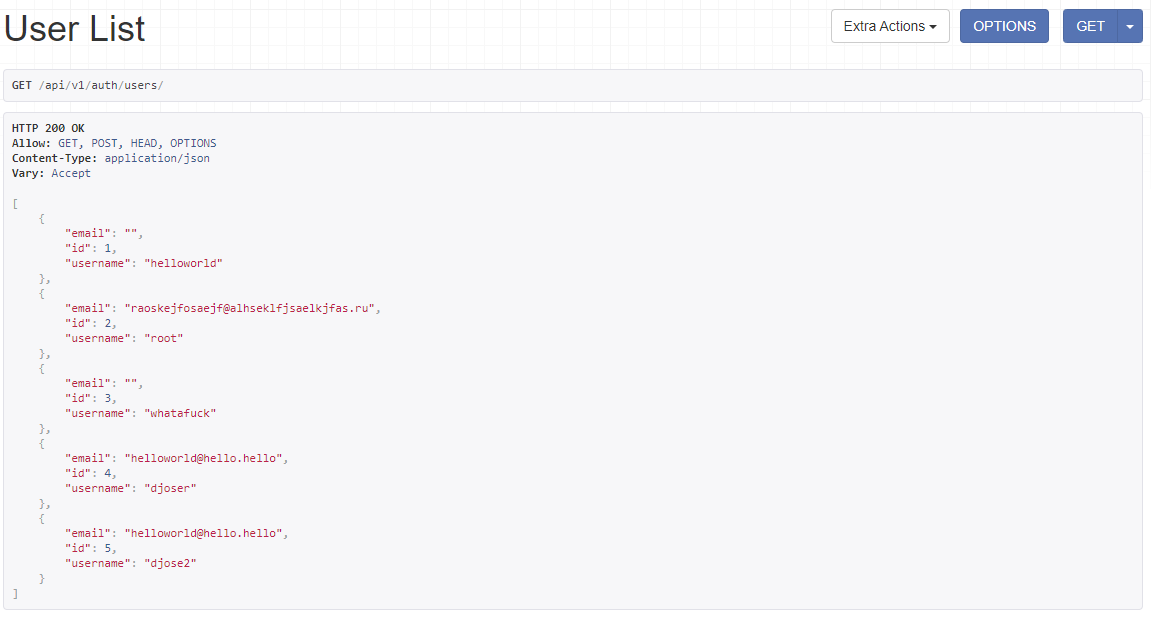

Чтобы добавить своего пользователя, можно выполнить следующую команду в терминале
```bash
curl -X POST -F "email=helloworld@hello.hello" -F "username=djose2" -F "password=EKLjss3asef" http://127.0.0.1:8000/api/v1/auth/users/
```

### Response
```json
{"email":"helloworld@hello.hello","username":"djose2","id":5}
```

С помощью пакета Djoser мы можем выполнять не только авторизацию и аутентификаю пользователя, но и регистрацию пользователя
удаление пользователя, изменение данных и тд.

все действия с пакетом Djoser находятся в документации <a style="color:red;">Base Endpoints</a>

Чтобы получить токен нужно выполнить команду 
```bash
curl -X POST -F "username=djose2" -F "password=EKLjss3asef" http://127.0.0.1:8000/auth/token/login/
```

### Response
```json
{
    "auth_token": "f89143f021b05d874d807a2a9a0cb91604cd0c66"
}
```

c помощью данного токена будет в дальнейшем производится аутентификация пользователя

Указываем для view's пермишены чтобы можно было выполнять действия только авторизированным пользователям 

Теперь добавляем в заголовок токен

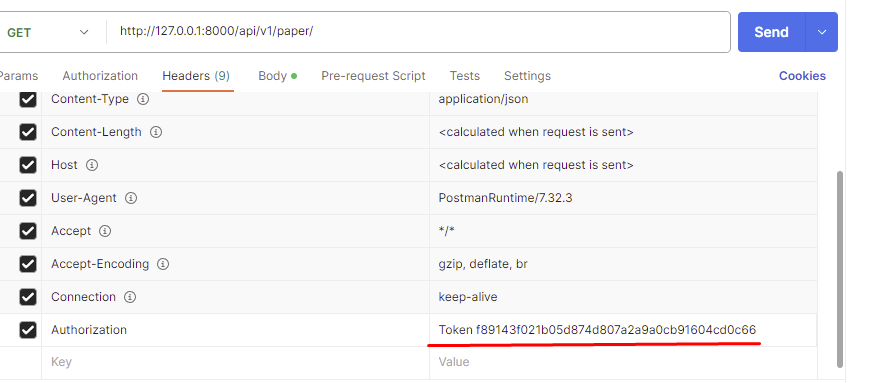

Чтобы сделать Logout нужно также указать токен в header и при этом сделать post запрос

Сейчас пользователи могут использовать 2 системы аутентификации по токенам и по сессиям
Но мы для каждого класса представления мы можем конкретизировать способ аутентификации пользователя
через атрибут **authentication_classes**
и добавляем туда метод из 
```python
from rest_framework.authentication import <method>
```
например TokenAuthentication

TokenAuthentication - предоставлять доступ только тем пользователям которые получают доступ именно по токенам, а по сессиям
мы доступ уже получить не сможем поскольку мы не указали